# S09_T02_Supervisat_Regressio

### Ex1: Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv


In [57]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [38]:
#carreguem dataset DelayedFlights.csv de la carpeta del Sprin2_Task5
pd.set_option("display.max_columns", None)
data_frame = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
data_frame.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [39]:
#un cop tenim les dades, estudiem i identifiquem nan values or anormality values, wrong or duplicates values
#per veure tot això, comprovem els valors estadístics de les nostres dades
data_frame.shape

(1936758, 30)

In [40]:
data_frame.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [41]:
#valors estadistics de les dades
pd.set_option("display.max_columns", None)
data_frame.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [42]:
data_frame.dropna(inplace=True)
data_frame.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [43]:
#comprovem duplicates i si n'hi ha els eliminem
data_frame.drop_duplicates(inplace=True)

In [45]:
#busquem relació de dependència entre els atributs
#aquest mètode de correlació ignora les variables no numèriques
#per tant, abans d'aplicar el mètode eliminem les variables no numèriques de les nostres dades
#o tb les podem transformar en dades numèriques amb getdummies però en aquest cas obtindrem un dataframe massa gran en 
#nombre de columnes, i no ens interessa per poder fer la nostra predicció
data_frame.drop(["Unnamed: 0","Year","UniqueCarrier", "TailNum", "Origin", "Dest", "CancellationCode"], axis=1, inplace=True)
data_frame.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1937.0,1830,2037.0,1940,509,240.0,250.0,230.0,57.0,67.0,1591,3.0,7.0,0,0,10.0,0.0,0.0,0.0,47.0
7,1,3,4,1644.0,1510,1845.0,1725,1333,121.0,135.0,107.0,80.0,94.0,828,6.0,8.0,0,0,8.0,0.0,0.0,0.0,72.0
9,1,3,4,1452.0,1425,1640.0,1625,675,228.0,240.0,213.0,15.0,27.0,1489,7.0,8.0,0,0,3.0,0.0,0.0,0.0,12.0
11,1,3,4,1323.0,1255,1526.0,1510,4,123.0,135.0,110.0,16.0,28.0,838,4.0,9.0,0,0,0.0,0.0,0.0,0.0,16.0


In [46]:
data_frame.std()

Month                   3.508937
DayofMonth              8.793008
DayOfWeek               1.993270
DepTime               454.330025
CRSDepTime            421.178173
ArrTime               583.941629
CRSArrTime            461.737224
FlightNum            1997.547303
ActualElapsedTime      72.296363
CRSElapsedTime         69.532013
AirTime                68.174537
ArrDelay               60.753795
DepDelay               59.868810
Distance              559.364335
TaxiIn                  6.033239
TaxiOut                16.679834
Cancelled               0.000000
Diverted                0.000000
CarrierDelay           43.546235
WeatherDelay           21.491535
NASDelay               33.833077
SecurityDelay           2.022716
LateAircraftDelay      42.054889
dtype: float64

In [47]:
data_frame.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.067025,0.009288,-0.008761,-0.013436,-0.001955,-0.001815,0.002552,0.003977,0.006615,0.000108,0.012338,0.015400,0.005831,0.023901,0.008151,NaN,NaN,0.000419,0.006614,0.011441,-0.003066,0.004953
DayofMonth,0.067025,1.000000,0.025953,0.003398,0.003589,0.003411,0.003952,-0.004902,-0.000012,0.000557,0.000363,0.009072,0.009867,-0.000213,-0.001363,-0.001040,NaN,NaN,-0.000946,0.000899,0.005644,-0.000308,0.009101
DayOfWeek,0.009288,0.025953,1.000000,0.021415,0.027812,0.007273,0.017265,-0.010011,0.004540,0.006200,0.005844,0.011901,0.013796,0.008989,0.011955,-0.008534,NaN,NaN,0.010215,0.005644,-0.006628,0.004665,0.008839
DepTime,-0.008761,0.003398,0.021415,1.000000,0.840260,0.373225,0.714217,-0.031745,-0.056818,-0.041476,-0.058621,0.093979,0.115809,-0.054876,-0.025117,0.002417,NaN,NaN,-0.051948,0.005304,0.022530,-0.015273,0.169453
CRSDepTime,-0.013436,0.003589,0.027812,0.840260,1.000000,0.287631,0.725630,-0.066639,-0.040359,-0.022065,-0.037336,0.017093,0.040455,-0.025229,-0.043289,-0.006671,NaN,NaN,-0.107337,-0.009333,-0.032701,-0.017064,0.167734
ArrTime,-0.001955,0.003411,0.007273,0.373225,0.287631,1.000000,0.480985,-0.003610,-0.028274,-0.029262,-0.031891,-0.079235,-0.080249,-0.044229,0.043106,-0.007793,NaN,NaN,-0.083980,-0.029867,0.032395,-0.007417,-0.037949
CRSArrTime,-0.001815,0.003952,0.017265,0.714217,0.725630,0.480985,1.000000,-0.071523,0.034482,0.048096,0.029776,0.024998,0.039587,0.032266,0.003945,0.026325,NaN,NaN,-0.096156,-0.005028,0.009227,-0.013349,0.131467
FlightNum,0.002552,-0.004902,-0.010011,-0.031745,-0.066639,-0.003610,-0.071523,1.000000,-0.326812,-0.341747,-0.346516,0.035803,0.034077,-0.362589,-0.005767,0.001858,NaN,NaN,0.055713,0.067477,0.015405,-0.002809,-0.052707
ActualElapsedTime,0.003977,-0.000012,0.004540,-0.056818,-0.040359,-0.028274,0.034482,-0.326812,1.000000,0.964738,0.969063,0.083738,-0.002151,0.944412,0.161621,0.315103,NaN,NaN,0.009962,0.004069,0.177135,0.005720,-0.034204
CRSElapsedTime,0.006615,0.000557,0.006200,-0.041476,-0.022065,-0.029262,0.048096,-0.341747,0.964738,1.000000,0.983946,0.031566,0.028441,0.981319,0.090193,0.127272,NaN,NaN,0.026586,-0.016475,0.046964,0.006104,-0.011584


Observem que tenim valors no vàlids en les columnes cancelled i diverted, això és degut a que la desviació standard és zero, i al calcular la correlació dividim per zero! Però per la resta tenim tots els parells de correlacions entre columnes amb la diagonal de 1 q indica que en la matriu cada columna està perfectament correlacionada amb ella mateixa.
Podem observar quines variables estan millor corelacionades amb la que volem predir: ArrDelay

In [ ]:
#Observem que ArrDelay té una correlació de 0.950323 amb DepDelay, per tant, correlació molt forta, gairebé perfecta! Tb té correlació 
#important amb CarrierDelay, LateAircraftDelay, i NasDelay. De fet, si observem bé les relacions de linealitat, podriem dir que hi ha
#tb una multicolinealitat entre algunes variables. Ens quedem amb la correlació entre DepDelay i ArrDelay per crear els diferents
#mètodes de regressió i obtenir la millor predicció!

##### Primer model a provar: regressió lineal entre ArrDelay i DepDelay

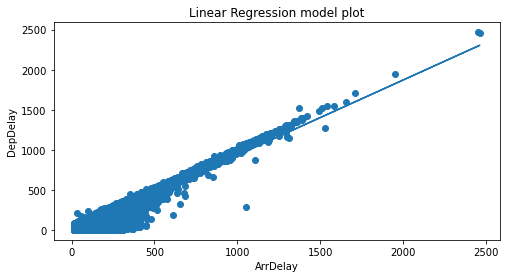

correlation_coef (r) =  0.9503232811833495
intercept =  0.40641006658633927
slope =  0.9364801579234355


In [80]:
#carreguem dataframe i eliminem valors nuls
model_lineal_regr = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
model_lineal_regr.dropna(inplace=True)

#separem en 2 arrays les dades que ens interessen per la regressió
x = np.array(model_lineal_regr.ArrDelay)
y = np.array(model_lineal_regr.DepDelay)

slope, intercept,r,p,std_err = stats.linregress(x,y)

def func(x):
    return slope*x + intercept

model = list(map(func, x))

plt.figure(figsize=(8,4))

plt.xlabel("ArrDelay")
plt.ylabel("DepDelay")
plt.title("Linear Regression model plot")

plt.scatter(x,y)
plt.plot(x, model)
plt.show()

print("correlation_coef (r) = ", r)
print("intercept = ", intercept)
print("slope = ", slope)

Tenim el gràfic del model de regressió, i les dades estadistiques obtingudes. Podem veure que com tenim una r alta, bastant propera a 1, si que hi ha una regressió lineal entre les dues variables.
Ara fem la predicció basant-nos en el model que hem creat!

In [75]:
#si utilitzem els mètodes de sklearn en lloc dels de scipy.stats podem calcular el rsquare_score ja que és un bon indicador
#de si les dades s' ajusten bé al model

x = np.array(model_lineal_regr.ArrDelay).reshape(-1, 1)
y = np.array(model_lineal_regr.DepDelay)

model_reg = LinearRegression().fit(x, y)

print("correlation_coef (r) = ", r)
print("intercept = ", intercept)
print("slope = ", slope)

r_sq_score = model_reg.score(x, y)
print("R2score = ", r_sq_score)

correlation_coef (r) =  0.9503232811833495
intercept =  0.40641006658633927
slope =  0.9364801579234355
R2score =  0.90311433875909


In [78]:
#volem predir l'endarreriment dels vols(ArrDelay), i ho podem fer amb el mètode creat ja que el model de regressió ens ha donat una
#correlació força bona, i un bon R2score (proper a 1) amb el que podem utilitzar el mètode de regressió lineal en futures prediccions

y_predict =  model_reg.predict(x)
MSE_reg = mean_squared_error(y, y_predict)
R2score_reg = r2_score(y, y_predict)

print("MSE: ", MSE_reg)
print("R2score_reg: ", R2score_reg)


MSE:  347.2645145091983
R2score_reg:  0.90311433875909


Veiem que la predicció és bona, obtenim el mateix r2_score amb les dues funcions...

##### Segon model: Decission Tree Regression

In [189]:
#carreguem dataframe i eliminem valors nuls
model_tree = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
model_tree.dropna(inplace=True)

#fem mostra del dataframe i mètode train_test
model_tree_sample = model_tree.sample(50000, random_state = 4)

X = np.array(model_tree_sample.DepDelay).reshape(-1, 1)
y = np.array(model_tree_sample.ArrDelay)

print(X.shape)
print(y.shape)

#Split dataframe en train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#Podem comprovar com s'ha dividit en els 2 grups, mirant la shape de tots dos:
print("Dimensions X_train: ", X_train.shape)
print("Dimensions y_train: ", y_train.shape)
print("Dimensions y_test: ", y_test.shape)
print("Dimensions X_test: ", X_test.shape)

(50000, 1)
(50000,)
Dimensions X_train:  (33500, 1)
Dimensions y_train:  (33500,)
Dimensions y_test:  (16500,)
Dimensions X_test:  (16500, 1)


In [190]:
dtree = DecisionTreeRegressor(random_state = 0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [235]:
#utilitzem el model creat per fer les prediccions
y_pred = dtree.predict(X_test)
#calcularem el Rsquared score ja que es un bon indicador de si les dades s'ajusten al model
r_sq_score_dtree = r2_score(y_test, y_pred)
print("R2score = ", r_sq_score_dtree)
#Calculem tb el Mean Squared error(MSE)
MSE_dtree = mean_squared_error(y_test, y_pred)
print("MSE: ", MSE_dtree)

R2score =  0.9032977235959847
MSE:  343.21215865715686


(16500,)


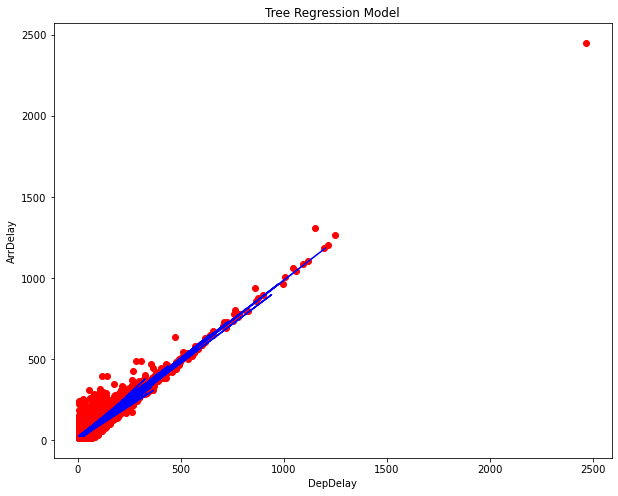

In [193]:
#visualitzem els resultats del Decision Tree Regression:
print(y_pred.shape)
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_test, y_pred, color = "blue")
plt.title("Tree Regression Model")
plt.xlabel("DepDelay")
plt.ylabel("ArrDelay")
plt.show()

Veiem que el gràfic ens mostra tant part lineal com part no contninua, això és pq aquest model de regressió és així...
és un model lineal i discontinu
El gràfic és una mica caòtic, ja que aquest mètode treballa millor amb condicions de més d'una dimensió!

##### Tercer model: Multiple Regression

In [ ]:
#Quan hem comprovat la correlació de la resta de variables amb ArrDelay, hem vist que a més de DepDelay
#que tenia una corralació molt alta, hi havia 3 variables més que tenien bona correlació: CarrierDelay, LateAircraftDelay, i NASDelay

In [194]:
#carreguem dataframe i eliminem valors nuls
model_multiple = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
model_multiple.dropna(inplace=True)

In [196]:
#definim predictors variables i variable independent
X = model_multiple[["DepDelay", "CarrierDelay", "LateAircraftDelay", "NASDelay"]]
y = model_multiple["ArrDelay"]

#Split dataframe en train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#Podem comprovar com s'ha dividit en els 2 grups, mirant la shape de tots dos:
print("Dimensions X_train: ", X_train.shape)
print("Dimensions y_train: ", y_train.shape)
print("Dimensions y_test: ", y_test.shape)
print("Dimensions X_test: ", X_test.shape)


Dimensions X_train:  (835815, 4)
Dimensions y_train:  (835815,)
Dimensions y_test:  (411671,)
Dimensions X_test:  (411671, 4)


In [237]:
#creem model
mult_regr = LinearRegression().fit(X_train, y_train)
print("correlation_coef = ", mult_regr.coef_)
print("intercept = ", mult_regr.intercept_)
r_sq_score_m = mult_regr.score(X_train, y_train)
print("R2score = ", r_sq_score_m)

correlation_coef =  [0.93653255]
intercept =  0.39282441820331115
R2score =  0.9034504779858877


In [240]:
#utilitzem el model creat per fer les prediccions,ja que La R2 és bastant propera a 1, el model ens serveix per fer prediciions
y_pred = mult_regr.predict(X_test)
#calcularem el Rsquared score ja que es un bon indicador de si les dades s'ajusten al model
r_sq_score_mult = mult_regr.score(X_test, y_pred)
print("R2score = ", r_sq_score_mult)
#Calculem tb el Mean Squared error(MSE)
MSE_mult = mean_squared_error(y_test, y_pred)
print("MSE: ", MSE_mult)

R2score =  1.0
MSE:  346.3219860659303


### Ex2: Compara’ls en base al MSE i al R2

In [ ]:
#RSquare/Adjusted RSquare, MSE/RMSE, MAE ens ajuden a avaluar els models de Regressió, part molt important a Data Science
#RSquare(o R2): measure how much variability in dependent variable can be explained by the model. It is a good measure 
#to determine how well the model fits the dependent variables
#MSE: give us an absolute number on how much our predicted results deviate from the actual number
#MAE: is a more direct representation of sum of error terms. Treats all errors the same.


In [209]:
#Regressió lineal
print("R2score_reg: ", R2score_reg)
print("MSE: ", MSE_reg)

R2score_reg:  0.90311433875909
MSE:  347.2645145091983


In [208]:
#Decission Tree Regression
print("R2score = ", r_sq_score_dtree)
print("MSE: ", MSE_dtree)

R2score =  1.0
MSE:  343.660756163349


In [210]:
#Multiple Regression
print("R2score = ", r_sq_score_mult)
print("MSE: ", MSE_mult)

R2score =  1.0
MSE:  182.94280870214428


Comparant tots tres models, podem observar pels paràmetres que avaluen els models, que en quant als dos paràmetres que ens demanen, R2 i MSE, el tercer model, el de Multiple Regression és el que ens dona una millor predicció, ja que té un MSE més baix, és a dir, una desviació més petita respecte la realitat, i un R2 de 1 (és a dir, un model que s'ajusta perfectament).

### Ex3: Entrena’ls utilitzant els diferents paràmetres que admeten

In [223]:
#Regressió lineal
X = np.array(model_lineal_regr.ArrDelay).reshape(-1, 1)
y = np.array(model_lineal_regr.DepDelay)
model_reg = LinearRegression(n_jobs=-1).fit(X, y)

#mirem els paràmetres del model, i observem que no hi ha cap paràmetre per poder entrenar el model...
model_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': False,
 'positive': False}

In [224]:
#el que si que podem fer és fent l'split de les dades usant el train-test, per veure si millorem els resultats de la predició i del model
#Split dataframe en train_test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#Podem comprovar com s'ha dividit en els 2 grups, mirant la shape de tots dos:
print("Dimensions X_train: ", X_train.shape)
print("Dimensions y_train: ", y_train.shape)
print("Dimensions X_test: ", X_test.shape)
print("Dimensions y_test: ", y_test.shape)

Dimensions X_train:  (835815, 1)
Dimensions y_train:  (835815,)
Dimensions X_test:  (411671, 1)
Dimensions y_test:  (411671,)


In [225]:
model_reg_2 = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [226]:
#fem la predicció:
y_predict_2 = model_reg_2.predict(X_test)

In [229]:
MSE_reg_2 = mean_squared_error(y_test, y_predict_2)
R2score_reg_2 = r2_score(y_test, y_predict_2)

print("MSE_reg_2: ", MSE_reg_2)
print("R2score_reg_2: ", R2score_reg_2)

MSE_reg_2:  346.3219860659303
R2score_reg_2:  0.9024215093300665


Comparant amb els valors que teniem abans de fer el train-test(MSE:  347.2645145091983, R2score_reg:  0.90311433875909) veiem que el model no ha canviat molt els seus valors, però si ha millorat lleugerament, en relació als dos paràmetres d'avaluació del model.

In [230]:
#Decission Tree Regression

#mirem els paràmetres del model
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [233]:
#canviarem els paràmetres max_depth=20 , i splitter="random" per veure si afecten al nostre model i, milloren la predicció
dtree = DecisionTreeRegressor(random_state = 0, max_depth =20, splitter="random" )
dtree_2 = dtree.fit(X_train, y_train)
y_predict_3 = dtree_2.predict(X_test)

MSE_dtree_2 = mean_squared_error(y_test, y_predict_3)
R2score_tree_2 = r2_score(y_test, y_predict_3)

print("MSE_tree_2: ", MSE_dtree_2)
print("R2score_tree_2: ", R2score_tree_2)

MSE_tree_2:  343.21215865715686
R2score_tree_2:  0.9032977235959847


Veiem que en aquest cas, els paràmetres modificats no afecten gens al model ni a la predicció! No han canviat niel R2 ni MSE.

In [241]:
#Multiple Regression

#mirem els paràmetres del model, i veiem que no hi ha cap paràmetre a variar com passava amb el mètode de regressió lineal
mult_regr.get_params()


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

Amb això veiem que variant alguns paràmetres no millorem més els nostres models, en canvi, els millorem una mica fent split train_test de les dades a la hora de crear el model i avaluar-lo. Ja s'havia fet el split train_test de les dades en dos dels models, i ara s'ha fet pel primer model que mancava.

### Ex4: Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

Ja s'ha fet l'aproximació train/test en els apartats anteriors, i s'ha vist que es millorava molt lleugerament el model i la seva predicció.

### Ex5: Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

### Ex6: No utilitzis la variable DepDelay a l’hora de fer prediccions